## **Deep Neural Network**

RNN

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM#, CuDNNLSTM
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [10]:
print(x_train[0].shape)

(28, 28)


In [30]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
classes=['0','1','2','3','4','5','6','7','8','9']

In [19]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

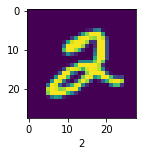

In [20]:
plot_sample(x_train,y_train,5)

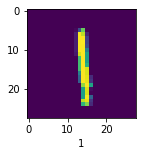

In [21]:
plot_sample(x_train,y_train,8)

building a Recurrent neural network to train our images

In [22]:
model = Sequential()

In [23]:
# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

In [24]:
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

In [25]:
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

In [26]:
model.add(Dense(10, activation='softmax'))

In [27]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [28]:
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [29]:
model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 117s 62ms/step - loss: 0.5401 - accuracy: 0.8288 - val_loss: 0.1602 - val_accuracy: 0.9511
Epoch 2/3
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1524 - accuracy: 0.9591 - val_loss: 0.1108 - val_accuracy: 0.9687
Epoch 3/3
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1035 - accuracy: 0.9716 - val_loss: 0.0808 - val_accuracy: 0.9801


Testing

In [31]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[2.02522976e-08, 2.59571570e-05, 3.78129567e-04, 8.06802564e-05,
        6.39283235e-06, 1.02457238e-06, 8.24419092e-12, 9.99396205e-01,
        6.91512878e-06, 1.04759783e-04],
       [7.47151635e-13, 4.49997875e-14, 1.00000000e+00, 5.89521444e-12,
        7.46288326e-21, 2.17529416e-16, 2.00896649e-15, 4.78334820e-13,
        2.97641957e-15, 2.16587328e-22],
       [1.10263215e-07, 9.99927402e-01, 3.60712465e-06, 1.22512370e-06,
        2.87642251e-07, 1.57214652e-06, 5.81980885e-06, 3.61220918e-06,
        5.62216737e-05, 1.62340200e-07],
       [9.99950647e-01, 2.12773958e-08, 2.08142519e-05, 2.97269782e-08,
        4.55326614e-07, 2.05849542e-08, 1.38990408e-05, 6.80419632e-08,
        1.36011613e-05, 4.50163554e-07],
       [5.04335636e-11, 1.58628902e-13, 6.00714628e-13, 1.00205685e-16,
        9.99999166e-01, 1.51211536e-13, 1.68171685e-10, 6.21099656e-12,
        2.45294096e-09, 8.78065919e-07]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

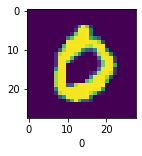

In [36]:
plot_sample(x_test, y_test,3)

In [37]:
classes[y_classes[3]]

'0'

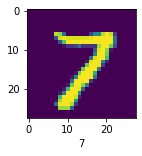

In [38]:
plot_sample(x_test, y_test,34)

In [39]:
classes[y_classes[34]]

'7'